In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import ast
import time
%matplotlib inline


pd.set_option('use_inf_as_na', True)

bomMovieGross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

imdbNameBasics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

imdbTitleAkas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

imdbTitleBasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

imdbTitleCrew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

imdbTitlePrincipals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

imdbTitleRatings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

rtMovieInfo = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

rtReviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

tmdbMovies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tnMovieBudgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

kaggleMovies = pd.read_csv('movies_metadata.csv', low_memory=False)

In [92]:
allFiles = [bomMovieGross, imdbNameBasics, imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings,
           rtMovieInfo, rtReviews, tmdbMovies, tnMovieBudgets]

In [93]:
allCols = list(map(lambda x: x.columns, allFiles))
allCols

[Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object'),
 Index(['nconst', 'primary_name', 'birth_year', 'death_year',
        'primary_profession', 'known_for_titles'],
       dtype='object'),
 Index(['tconst', 'primary_title', 'original_title', 'start_year',
        'runtime_minutes', 'genres'],
       dtype='object'),
 Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
        'attributes', 'is_original_title'],
       dtype='object'),
 Index(['tconst', 'directors', 'writers'], dtype='object'),
 Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object'),
 Index(['tconst', 'averagerating', 'numvotes'], dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['Unnamed: 0', 'genre_ids', 'id', 'origin

In [94]:
def inflate(amountOfMoney, year):
    yearsOfInflation = 2021 - year
    amountOfMoney    = amountOfMoney - (amountOfMoney * (yearsOfInflation * .02))
    return amountOfMoney

In [95]:
inflate(100, 1980)

18.0

In [102]:
kaggleMovies.head()

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,percent returns
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN


In [ ]:
kaggleMovies

In [138]:
kaggleMovies['release_date'].sort_values()

34940    1874-12-09
34937    1878-06-14
41602    1883-11-19
34933    1887-08-18
34934    1888-01-01
            ...    
45148           NaN
45203           NaN
45338           NaN
45410           NaN
45461           NaN
Name: release_date, Length: 45466, dtype: object

In [133]:
kaggleMovies.loc[[19730,29503], ["release_date"]] = np.nan


In [112]:
# kaggleMovies['genres'] = kaggleMovies.genres.apply(lambda x: list(ast.literal_eval(x)))

# kaggleMovies['genres'] = kaggleMovies.genres.apply(lambda x: x.strip('()').split(','))

[0]

for each in kaggleMovies['genres']

["[{'id': 16",
 " 'name': 'Animation'}",
 " {'id': 35",
 " 'name': 'Comedy'}",
 " {'id': 10751",
 " 'name': 'Family'}]"]

In [ ]:
["[{'id': 16", " 'name': 'Animation'}", " {'id': 35", " 'name': 'Comedy'}", " {'id': 10751", " 'name': 'Family'}]"]

In [141]:
kaggleMovies['release_date'] = pd.to_datetime(kaggleMovies['release_date'], errors = 'coerce')


In [14]:
type(kaggleMovies['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [116]:
pd.to_datetime(kaggleMovies['release_date'][0])

1995-10-30 00:00:00


In [28]:
# kaggleMovies['budget'] = pd.to_numeric(kaggleMovies['budget'], errors='coerce')
# kaggleMovies['popularity'] = pd.to_numeric(kaggleMovies['popularity'], errors='coerce')
# kaggleMovies['release_date'] = pd.to_datetime(kaggleMovies['release_date'], format='%Y-%m-%d')
# kaggleMovies['release_date'] = kaggleMovies['release_date'].astype('datetime64[D]')
# kaggleMovies['release_date'] = kaggleMovies['release_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# kaggleMovies['percent returns'] = kaggleMovies['revenue'] / kaggleMovies['budget']
# kaggleMovies.replace(np.inf, np.nan)
# kaggleMovies['release_date' = pd.to_datetime(tnMovieBudgets[‘release_date’], errors=‘coerce’)
# kaggleMovies['genres'] = kaggleMovies['genres']


# kaggleMovies.corr()
# kaggleMovies.info()

In [33]:
# pd.DataFrame(kaggleMovies['genres'].value_counts())
# there are only 9 adult movies, useless
# 4069 disticnt genre entries, 2442 blank as []



kaggleMovies.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count,percent returns
budget,1.000000,0.449645,0.768776,0.134733,0.073494,0.676642,-0.012564
popularity,0.449645,1.000000,0.506179,0.129927,0.154399,0.559965,-0.003939
revenue,0.768776,0.506179,1.000000,0.103917,0.083868,0.812022,-0.005508
runtime,0.134733,0.129927,0.103917,1.000000,0.158146,0.113539,-0.005188
vote_average,0.073494,0.154399,0.083868,0.158146,1.000000,0.123607,0.013160
vote_count,0.676642,0.559965,0.812022,0.113539,0.123607,1.000000,-0.003032
percent returns,-0.012564,-0.003939,-0.005508,-0.005188,0.013160,-0.003032,1.000000


<AxesSubplot:>

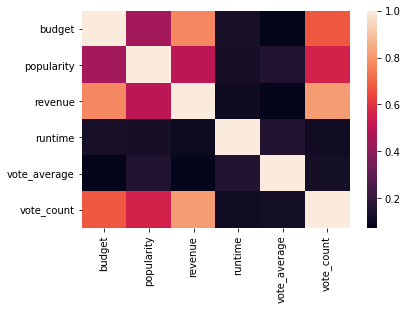

In [29]:
sns.heatmap(kaggleMovies.corr())

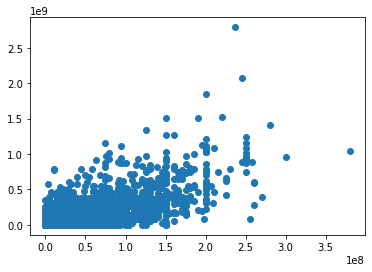

In [40]:
plt.scatter(kaggleMovies['budget'], kaggleMovies['revenue'])


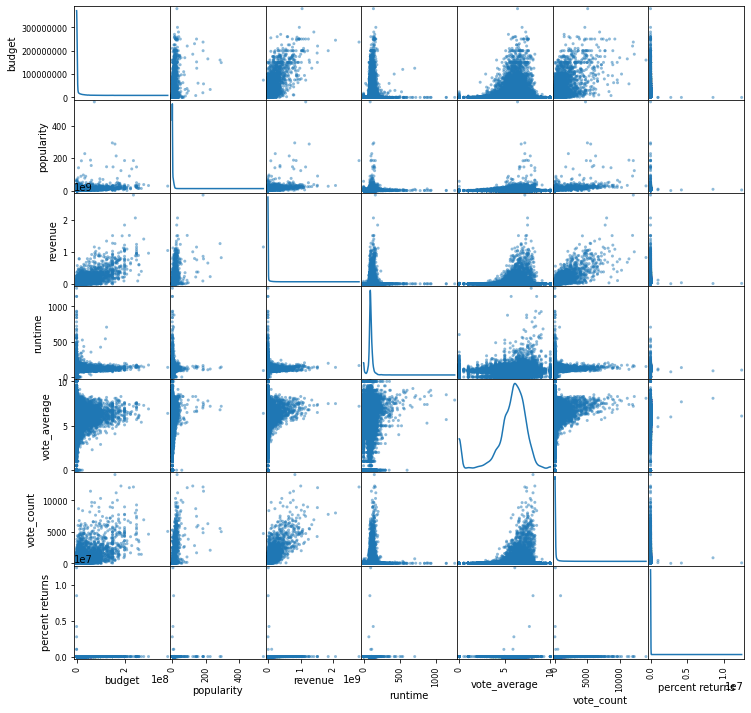

In [174]:
# kagInfo = pd.DataFrame(kaggleMovies[['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count']])
pd.plotting.scatter_matrix(kaggleMovies, figsize=(12,12), diagonal='kde');

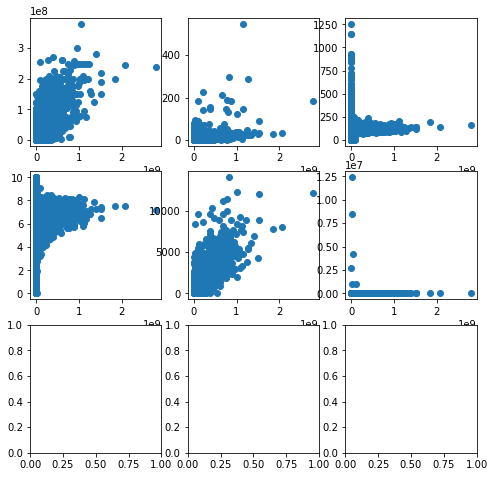

In [270]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
ax[0][0].scatter(kaggleMovies['revenue'], kaggleMovies['budget'])
ax[0][1].scatter(kaggleMovies['revenue'], kaggleMovies['popularity'])
ax[0][2].scatter(kaggleMovies['revenue'], kaggleMovies['runtime'])
ax[1][0].scatter(kaggleMovies['revenue'], kaggleMovies['vote_average'])
ax[1][1].scatter(kaggleMovies['revenue'], kaggleMovies['vote_count'])
ax[1][2].scatter(kaggleMovies['revenue'], kaggleMovies['percent returns'] )

In [ ]:
def average_genre_col (genre, column):
    avg_ani = kaggleMovies[kaggleMovies['main_genre'] == genre]
    length = len(avg_ani[column]) - avg_ani[column].isna().sum()
    print({genre:(avg_ani[column].sum() / length)})
    
for genre in kaggleMovies['main_genre'].unique():
    listy = (average_genre_col(genre, 'revenue'))
list(map(lambda genre: average_genre_col(genre, 'revenue'), kaggleMovies['main_genre'].unique()))    

In [103]:
# bomMovieGross

In [104]:
moviesPerStudioPerYear = bomMovieGross.groupby(['year', 'studio']).count()

In [105]:
# imdbNameBasics

In [106]:
# imdbTitleAkas

In [107]:
# imdbTitleBasics

In [108]:
# imdbTitleCrew

In [109]:
# imdbTitlePrincipals

In [110]:
# imdbTitleRatings

In [111]:
# rtMovieInfo

In [112]:
# rtReviews

In [113]:
# tmdbMovies

In [114]:
# tnMovieBudgets

In [244]:

# Removes commas and dollar signs, converts to int

# tnMovieBudgets['worldwide_gross']   = list(map(lambda x: int(x.replace(',','').replace('$','')), tnMovieBudgets['worldwide_gross']))

# tnMovieBudgets['domestic_gross']    = list(map(lambda x: int(x.replace(',','').replace('$','')), tnMovieBudgets['domestic_gross']))

# tnMovieBudgets['production_budget'] = list(map(lambda x: int(x.replace(',','').replace('$','')), tnMovieBudgets['production_budget']))

tnMovieBudgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [245]:
tnPercentReturns =pd.DataFrame(tnMovieBudgets['worldwide_gross'] / tnMovieBudgets['production_budget'])
tnPercentReturns



,0
0,6.532577
1,2.546673
2,0.427892
3,4.243841
4,4.153696
...,...
5777,0.000000
5778,40.082500
5779,0.267600
5780,0.000000


In [246]:
# usable data
# func. inflate(amountOfMoney, year) cuts the value by 2% every year it is old.

# moviesPerStudioPerYear
# percentReturnOverBudget
returnOverBudgetAndEntryCost = percentReturnOverBudget.join(tnMovieBudgets['production_budget'])
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,25))
# ax[0][0].scatter(x=returnOverBudgetAndEntryCost['Percent Returns'],y = returnOverBudgetAndEntryCost['production_budget'])
returnOverBudgetAndEntryCost.loc[:,['Percent Returns', 'production_budget']].plot('production_budget','Percent Returns',kind = 'hist')

NameError: name 'percentReturnOverBudget' is not defined

In [118]:
fin = pd.DataFrame(data = tnMovieBudgets['movie'])
finaldf = fin.join(tnPercentReturns)
percentReturnOverBudget = finaldf.rename(columns = {0:'Percent Returns'}).sort_values('Percent Returns', ascending = False)
# finaldf.set_index('Percent Returns') 
percentReturnOverBudget

NameError: name 'tnPercentReturns' is not defined

In [119]:
# imdbConcise = pd.concat[imdbTitleAkas, imdbTitleBasics, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings]
# imdbNameBasics.set_index
imdbConcise1 = imdbTitleBasics.join(imdbTitleRatings, rsuffix = 'rateData')
imdbConcise1

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,tconstrateData,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt10356526,8.3,31.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt1042974,6.4,20.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt1060240,6.5,21.0
...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN,NaN


In [120]:
imdbConcise2 = imdbConcise1.join(imdbTitleAkas, rsuffix = 'akasData')
imdbConcise2

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,tconstrateData,averagerating,numvotes,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt10356526,8.3,31.0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559.0,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt1042974,6.4,20.0,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352.0,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt1060240,6.5,21.0,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,NaN,tt4045476,4,Burning Love 2,NaN,NaN,original,NaN,1.0
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,NaN,tt4045476,5,Égető szerelem 2.,HU,NaN,NaN,NaN,0.0
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,NaN,tt4047074,1,Scrap Girl,CH,NaN,NaN,NaN,0.0
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN,NaN,tt4047114,1,Flesh Eating Bastards,US,NaN,NaN,NaN,0.0


# Mock Final Notebook

# Technical Notebook for Microsoft Movie Production Reccomendation
<b>Authors: </b>Jamie Dowat, Christos Maglaras

## Project Overview
The entertainment industry has been growing consistenty, with last year being the first to reach 100 billion in worldwide entertainment revenue. This is largley due to the shift from the traditional cinema experience to streaming services that offer higher convenience and more content that is accessable at any time. As the current environment is ready for new players in the field, Microsoft has a great oppurtunity to claim a spot in the growing entertainment sector.

Our aim is to aid the shareholders in the decision of whether to join the entertainment sector or not, and if so, what guidelines to follow for an optimal rate of success. 
## Business Understanding
The main players in this field can be divided into two groups, one group is of pre-existing large companies who added movie production to their extensive list of products, and the second group which contains companies that soley stream and produce. In the first group are Amazon, Apple, and Disney. In the second there is Netflix, HBO, and Hulu. Microsoft would join the first group, most closely related to Amazon and Apple, sharing qualities of both. Members of both groups are usefull to learn from as well, each has a unique style of payment methods, interface, content selection, and perks, among other features.
## Data Understanding
...
## Data Preperation
<b>Nessesary Librarys<b/>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import ast
# import warnings
# warnings.filterwarnings("ignore")

These are the csv's that contain the data we manipulated
kaggleMovies is the only self-sourced data, collected from [Kaggle Movie Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv)

In [32]:
#kagglemovies is responsible for the error, ignore
kaggleMovies        = pd.read_csv('movies_metadata.csv')
bomMovieGross       = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdbNameBasics      = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdbTitleAkas       = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdbTitleBasics     = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdbTitleCrew       = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdbTitlePrincipals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdbTitleRatings    = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
rtMovieInfo         = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')
rtReviews           = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')
tmdbMovies          = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tnMovieBudgets      = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

C:\Users\Chris\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


This pandas option below remidies an issue we encounter later on with infinite ratios

In [33]:
pd.set_option('use_inf_as_na', True)

Starting with the kaggle dataset, we can see that all values are strings, even the interger/float values. Let's fix that for two metrics below.

In [34]:
kaggleMovies['budget'] = pd.to_numeric(kaggleMovies['budget'], errors='coerce')
kaggleMovies['popularity'] = pd.to_numeric(kaggleMovies['popularity'], errors='coerce')

Added a column that represents the return over initial investment here

In [35]:
kaggleMovies['percent returns'] = (kaggleMovies['revenue'] / kaggleMovies['budget'])*100

We see a pair of illegitimate values inhibiting us from converting all to datetime values, I reassign them as nan

In [36]:
kaggleMovies.loc[[19730,29503], ["release_date"]] = np.nan

Here the dates are all converted to datetime objects, errors = 'coerce' forces values such as nan to become datetime objects, instead of failing the process

In [37]:
kaggleMovies['release_date'] = pd.to_datetime(kaggleMovies['release_date'], errors = 'coerce')

Next lets repair the 'genres' column. The issue is that it is a list of dictionaries represented as a string, we will use the ast library to de-string these two columns. 

In [38]:
kaggleMovies['genres']               = list(map(lambda x:ast.literal_eval(x),kaggleMovies['genres']))
# kaggleMovies['production_countries'] = list(map(lambda x:ast.literal_eval(x),kaggleMovies['production_countries']))
# kaggleMovies['production_companies'] = list(map(lambda x:ast.literal_eval(x),kaggleMovies['production_companies']))


There are over 2000 empty lists in 'genres', 

In [39]:
kaggleMovies['genres'] = kaggleMovies['genres'][kaggleMovies['genres'].apply(len)>0]
kaggleMovies.dropna(subset = ['genres'], inplace = True)

In [40]:
kaggleMovies['main_genre'] = list(map(lambda x: x[0]['name'] ,kaggleMovies['genres']))

The 'adult' column only has nine positive values out of over 45k entries, offering us no statistical value. Drop it

Drop the following columns as well, each is irrelavent to our topic

In [41]:
kaggleMovies.drop(['adult',
                   'belongs_to_collection',
                   'tagline',
                   'video',
                   'poster_path',
                   'overview',
                   'homepage'], axis = 1, inplace = True)

Drop duplicates of the same movie appearing more than once, using  'imdb_id' leads us to forty eight duplicates to drop.

In [42]:
kaggleMovies.drop_duplicates(subset = 'imdb_id', inplace = True)

Remove all unreleased movies under 'status'

In [43]:
kaggleMovies = kaggleMovies.drop(kaggleMovies['status'][kaggleMovies['status'] != 'Released'].index)

Added year, month, and day columns for use in visualization

Why not add in what week and what day of the week the movie released

In [44]:
kaggleMovies['year']        = list(map(lambda x: x.year, kaggleMovies['release_date']))
kaggleMovies['month']       = list(map(lambda x: x.month, kaggleMovies['release_date']))
kaggleMovies['day']         = list(map(lambda x: x.day, kaggleMovies['release_date']))

kaggleMovies['day_of_week'] = list(map(lambda x: x.dayofweek, kaggleMovies['release_date']))
kaggleMovies['week']        = list(map(lambda x: x.week, kaggleMovies['release_date']))

## Data Modeling

~~~
   ____                          ______                 ___ 
  / __ \__  ______ _____  ____ _/ ____/___ _____  ____ /__ \
 / / / / / / / __ `/ __ \/ __ `/ / __/ __ `/ __ \/ __ `// _/
/ /_/ / /_/ / /_/ / / / / /_/ / /_/ / /_/ / / / / /_/ //_/  
\___\_\__,_/\__,_/_/ /_/\__, /\____/\__,_/_/ /_/\__, /(_)   
 /_  __/__  ____ _____ /____/  <  /            /____/       
  / / / _ \/ __ `/ __ `__ \    / /                          
 / / /  __/ /_/ / / / / / /   / /                           
/_/  \___/\__,_/_/ /_/ /_/   /_/   

~~~

In [45]:
sns.set_theme(style="darkgrid")


In [149]:
len(kaggleMovies)

42591

In [47]:
votecount/runtime


NameError: name 'votecount' is not defined

<AxesSubplot:>

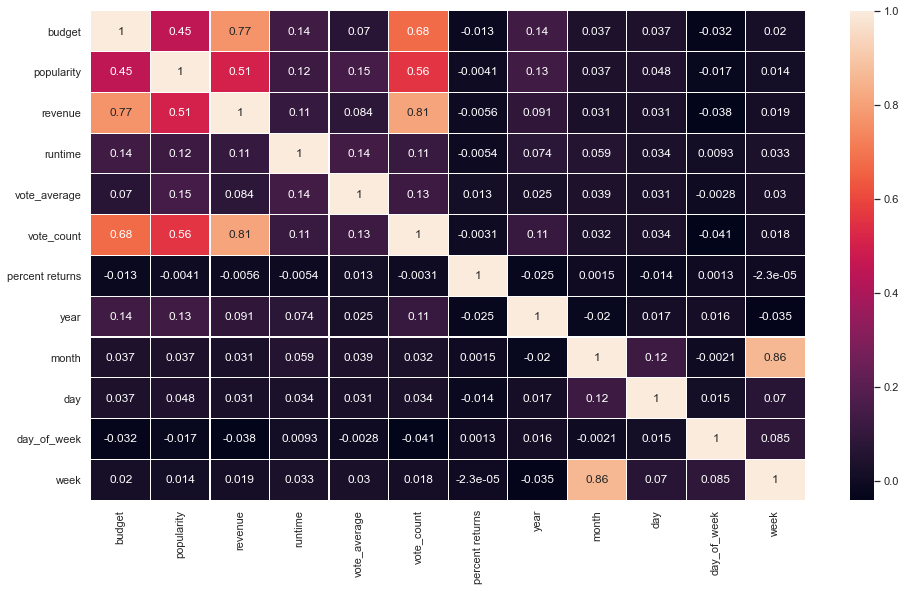

In [145]:
heatmap, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(kaggleMovies.corr(), annot=True, linewidths = 0.1)

<AxesSubplot:>

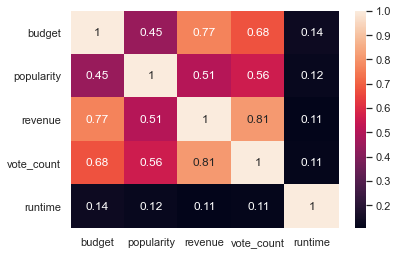

In [146]:
heatmapdb = kaggleMovies[['budget','popularity', 'revenue', 'vote_count','runtime']]
sns.heatmap(heatmapdb.corr(), annot = True, linewidths = 0)

C:\Users\Chris\anaconda3\envs\learn-env\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


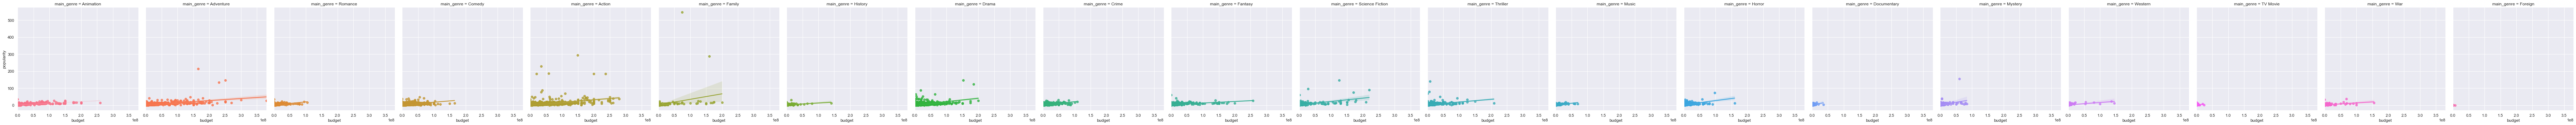

In [50]:
# budrev, ax = plt.subplots()
sns.lmplot(data = kaggleMovies
          , x = 'budget'
          , y = 'popularity'
          , col = 'main_genre'
          , hue = 'main_genre'
          , truncate = True
          , )
# g.set(xlim=(0, 80), ylim=(-.05, 1.05))


C:\Users\Chris\anaconda3\envs\learn-env\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


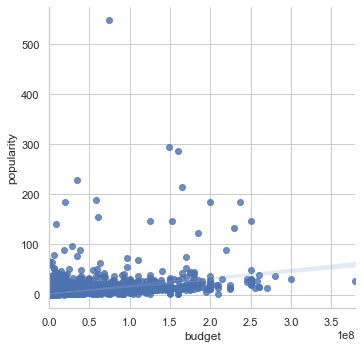

In [150]:
sns.lmplot(data = kaggleMovies,
          x = 'budget',
          y = 'popularity')

C:\Users\Chris\anaconda3\envs\learn-env\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


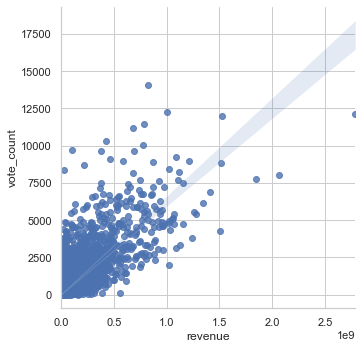

In [151]:
sns.lmplot(data = kaggleMovies,
          x = 'revenue',
          y = 'vote_count')

C:\Users\Chris\anaconda3\envs\learn-env\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


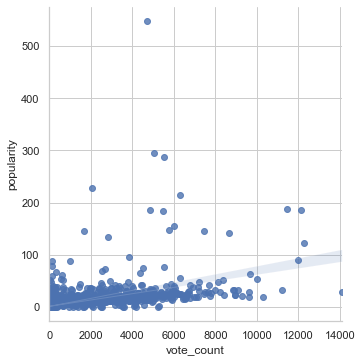

In [153]:
sns.lmplot(data = kaggleMovies,
          x = 'vote_count',
          y = 'popularity')

C:\Users\Chris\anaconda3\envs\learn-env\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


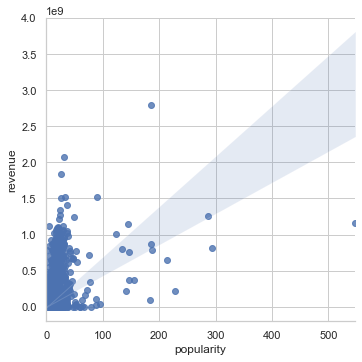

In [154]:
sns.lmplot(data = kaggleMovies,
          x = 'popularity',
          y = 'revenue')

In [95]:
# sns.lmplot(data = kaggleMovies,
#           x = 'budget',
#           y = 'popularity',
#           hue = 'main_genre',
#           height = 30,
#           truncate = False,
#           palette = 'dark')

[Text(0.5, 0, 'Popularity'), Text(0, 0.5, 'Revenue')]

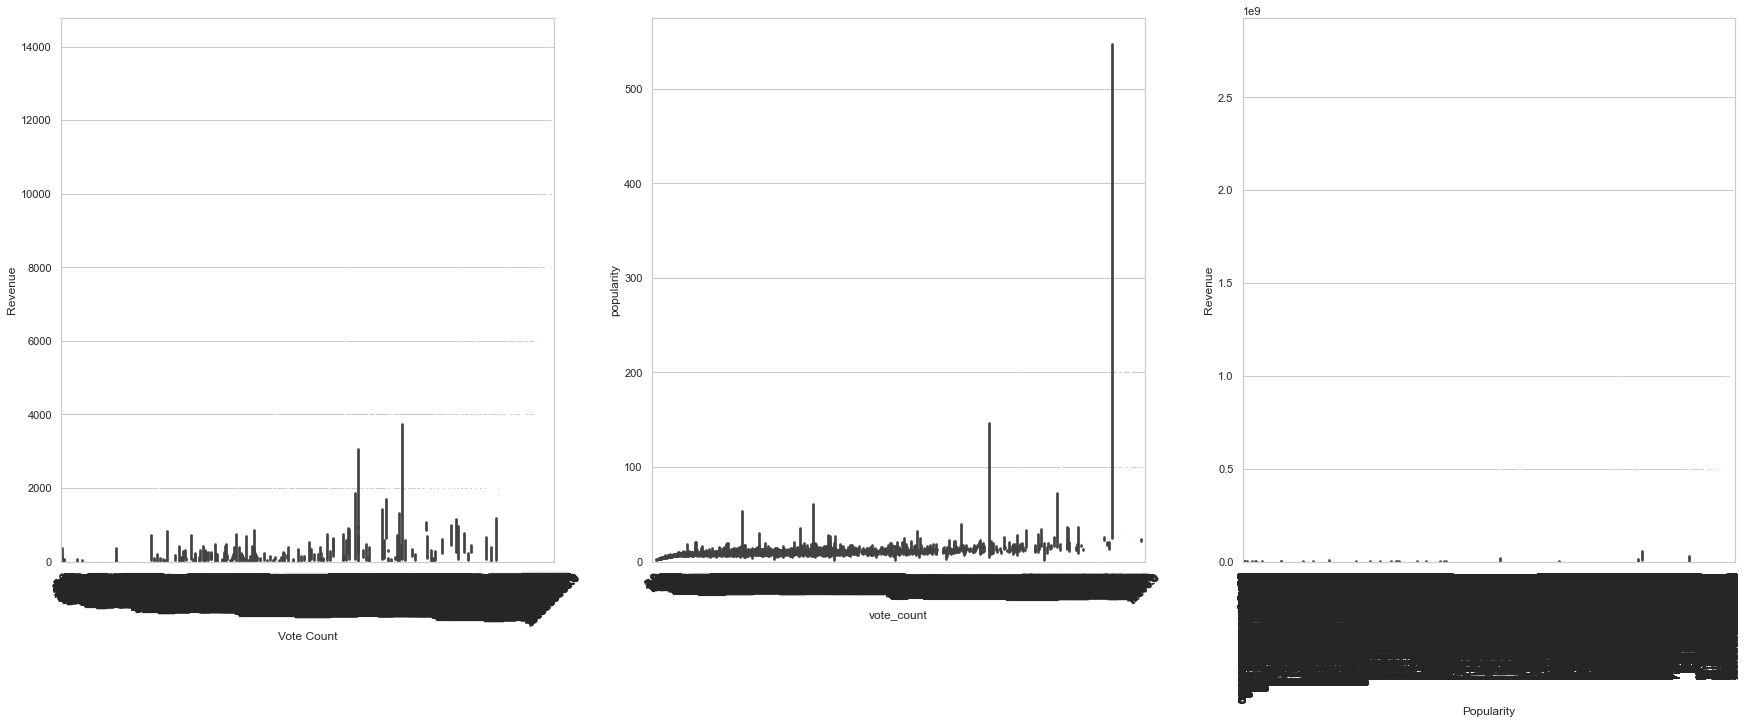

In [148]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30, 10), sharex = False)

ax1 = sns.barplot(data = kaggleMovies,
           y = 'vote_count',
           x = 'revenue',
           label = 'Revenue per Genre',
           color = 'm', ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set(xlabel = 'Vote Count', ylabel='Revenue')

ax2 = sns.barplot(data = kaggleMovies,
           x = 'vote_count',
           y = 'popularity',
           label = 'Revenue per Genre',
           color = 'g', ax = ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set(xlabel = 'Vote Count', ylabel='Popularity')

ax3 = sns.barplot(data = kaggleMovies,
           x = 'popularity',
           y = 'revenue',
           label = 'Revenue per Genre',
           color = 'm', ax = ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set(xlabel = 'Popularity', ylabel='Revenue')



[Text(0.5, 0, 'Main Genre'), Text(0, 0.5, 'Revenue')]

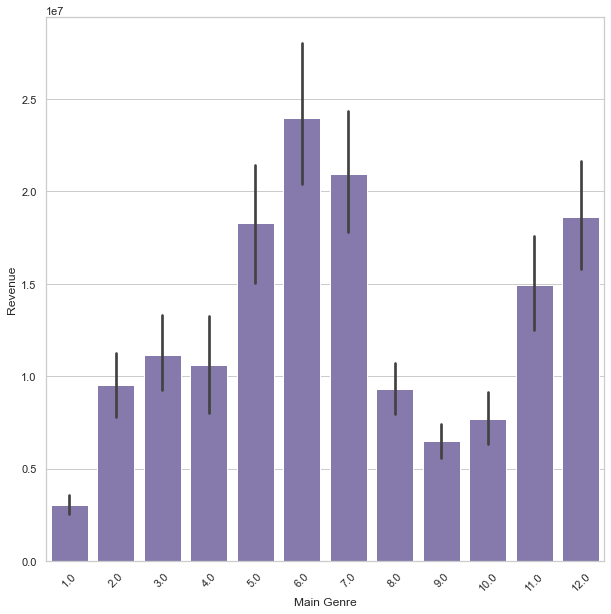

In [109]:
fig, ax = plt.subplots(figsize=(10, 10))

mgr = sns.barplot(data = kaggleMovies,
           x = 'main_genre',
           y = 'revenue',
           label = 'Revenue per Genre',
           color = 'm')
mgr.set_xticklabels(mgr.get_xticklabels(), rotation=45)
mgr.set(xlabel = 'Main Genre', ylabel='Revenue')

## Evaluation

## Conclusions